## 모집단과 표본

- 모집단(population) : 정보를 얻고자 하는 관심 대상의 전체집합을 말한다.
- 표본(sample) : 분석의 대상이 되는 전체집단. 즉 모집단(population)

## 확률표본

- 단순 임의 추출(simple random sampling) : 모집단(population)의 각각의 요소 또는 사례들이 표본(sample)으로 선택될 가능성이 같게 되는 표본 추출법.
- 단순 임의 추출을 통하여 추출된 표본을 `확률표본`이라고 부른다.
- cf. 편의표본 : 개체가 표본에 포함되는 가능성을 알 수 없는 표본.

## 예제 공공자전거 자료

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
url1 = "https://ilovedata.github.io/teaching/bigdata2/data/seoul_bike_201909_3.csv"
bike = pd.read_csv(url1, encoding="CP949")

- 데이터프레임 `bike`는 2019년 9월에 발생한 모든 대여정보를 수록한 자료이므로 모집단이다.

### EDA

In [21]:
bike.head(10)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-17003,2019-09-28 16:10:55,368,SK 서린빌딩 앞,4,2019-09-28 17:03:32,2002,노들역 1번출구,14,52,8940.0
1,SPB-14405,2019-09-28 16:48:16,2024,상도역 1번출구,3,2019-09-28 17:03:44,2002,노들역 1번출구,18,15,1910.0
2,SPB-18431,2019-09-28 16:59:54,2002,노들역 1번출구,10,2019-09-28 17:03:57,2002,노들역 1번출구,10,2,30.0
3,SPB-04853,2019-09-28 15:31:49,207,여의나루역 1번출구 앞,32,2019-09-28 17:10:12,2002,노들역 1번출구,19,98,9610.0
4,SPB-11122,2019-09-28 15:35:41,207,여의나루역 1번출구 앞,14,2019-09-28 17:10:37,2002,노들역 1번출구,18,90,9450.0
5,SPB-23089,2019-09-28 17:02:37,2003,사육신공원앞,5,2019-09-28 17:13:44,2002,노들역 1번출구,10,10,1410.0
6,SPB-15669,2019-09-28 16:17:54,2213,고속터미널역 5번출구 앞,7,2019-09-28 17:14:22,2002,노들역 1번출구,8,56,0.0
7,SPB-09727,2019-09-28 17:04:56,2002,노들역 1번출구,5,2019-09-28 17:17:10,2002,노들역 1번출구,17,11,380.0
8,SPB-10053,2019-09-28 16:59:45,2002,노들역 1번출구,3,2019-09-28 17:17:53,2002,노들역 1번출구,5,17,1080.0
9,SPB-14487,2019-09-28 16:01:41,2024,상도역 1번출구,5,2019-09-28 17:20:44,2002,노들역 1번출구,14,78,13870.0


In [22]:
bike.shape

(407589, 11)

In [23]:
bike.columns

Index(['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간', '이용거리'],
      dtype='object')

시각화

<AxesSubplot:ylabel='Frequency'>

C:\Users\22668\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\22668\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\22668\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\22668\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


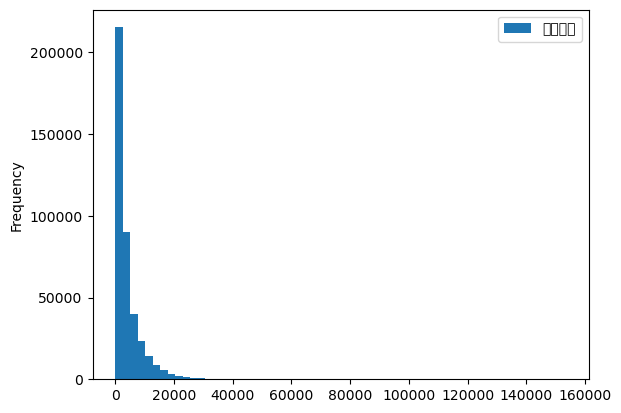

In [24]:
# 이용거리 plotting
bike.plot.hist(y="이용거리",bins=60)

- 오른쪽으로 꼬리가 긴 분포.(오른쪽으로 치우친 분포)

요약통계량 보기

In [25]:
bike[["이용거리"]].describe()

,이용거리
count,407589.000000
mean,4253.336228
std,5782.673901
min,0.000000
25%,1200.000000
50%,2380.000000
75%,5130.000000
max,153490.000000


### 확률표본의 추출

- df.sample(n=None,frac=None,replace=False,weights=None,random_state,axis=None,ignore_index=False) 사용
    - n : 표본의 크기
    - frac : 표본의 비율
    - replace : 복원추출 여부
    - random_state : 난수 지정
- with replacement(비복원추출) : 추출된 자료를 다시 뽑을 수 있음(replace = True)
- without replacement(복원추출) : 추출된 자료는 다시 뽑을 수 없음(replace = False)
- 상자에 있는 공 100개를 눈 감고 뽑는 경우 다시 넣고 뽑기(복원추출) 다시 안 넣고 뽑기(비복원추출)

크키가 100인 표본을 뽑고 이용거리의 특성 살펴보기

In [32]:
bike_sample_100 = bike.sample(n=100,replace=False,random_state=1)
bike_sample_100.head(10)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
375631,SPB-11285,2019-09-21 10:06:07,1452,겸재교 진입부,9,2019-09-21 10:38:10,3520,광진경찰서,4,30,5920.0
219156,SPB-10989,2019-09-24 22:36:38,2321,학여울역 사거리,9,2019-09-24 22:41:46,2320,도곡역 대치지구대 방향,1,4,0.0
2646,SPB-20213,2019-09-11 15:51:03,1986,태평양물산빌딩,8,2019-09-11 16:28:15,2007,유한양행앞,6,37,5450.0
329716,SPB-05859,2019-09-11 09:09:47,1912,한신휴아파트 앞,9,2019-09-11 09:15:23,2801,대륭포스트타워1차,14,5,830.0
35470,SPB-03699,2019-09-01 14:19:17,2265,이수고가차도 남단,2,2019-09-01 14:34:28,2060,남성역3번출구 뒤,6,14,2160.0
132032,SPB-03922,2019-09-20 22:09:34,274,영등포역지하쇼핑센타 5번출구,1,2019-09-20 23:14:57,2219,"고속터미널역 8-1번, 8-2번 출구 사이",9,65,11820.0
15067,SPB-17943,2019-09-17 18:24:58,2002,노들역 1번출구,18,2019-09-17 19:57:08,2025,흑석역 1번출구,3,91,8560.0
226253,SPB-07462,2019-09-03 18:27:38,2358,구룡초사거리 (현대아파트10동 앞 ),4,2019-09-03 18:41:48,2329,르네상스호텔사거리 역삼지하보도 2번출구,6,13,2520.0
318420,SPB-13058,2019-09-10 15:52:12,2620,송파나루역 4번 출구옆,7,2019-09-10 16:05:27,2622,올림픽공원역 3번출구,8,13,2220.0
405911,SPB-18550,2019-09-09 19:10:55,549,아차산역 3번출구,5,2019-09-09 19:19:11,3542,래미안 구의파크 스위트,17,7,1090.0


추출한 표본에서의 이동거리 분포 + 요약통계량 살펴보기(표본 파악)

<AxesSubplot:ylabel='Frequency'>

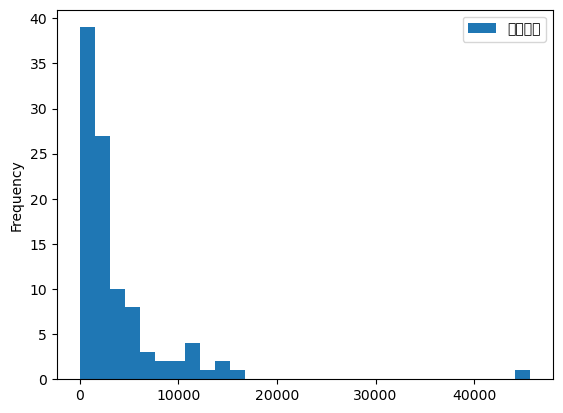

In [39]:
bike_sample_100.plot.hist(y="이용거리",bins=30)

<AxesSubplot:>

C:\Users\22668\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\22668\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\22668\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\22668\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


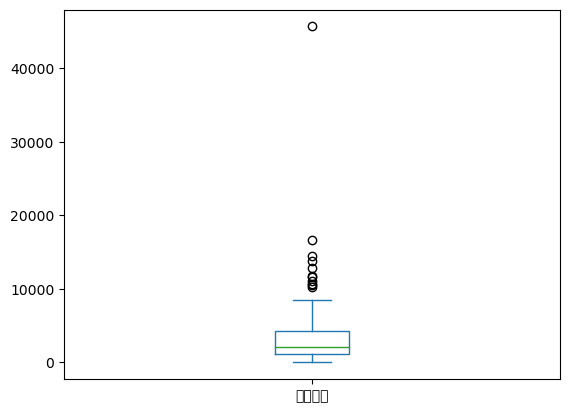

In [42]:
bike_sample_100.plot.box(y="이용거리")

In [46]:
bike_sample_100[["이용거리"]].describe()

,이용거리
count,100.000000
mean,3824.100000
std,5524.629901
min,0.000000
25%,1157.500000
50%,2170.000000
75%,4285.000000
max,45700.000000


크키가 10000인 표본을 뽑고 이용거리의 특성 살펴보기

In [53]:
bike_sample_10000 = bike.sample(n=10000,replace=False,random_state=2)
bike_sample_10000.head(100)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
96387,SPB-16561,2019-09-20 10:21:46,2140,신림1교 교차로,7,2019-09-20 10:38:58,2173,당곡사거리,3,16,2310.0
324061,SPB-24348,2019-09-11 19:21:40,1184,마곡13단지,5,2019-09-11 19:56:02,2701,마곡나루역 5번출구 뒤편,6,34,3020.0
20552,SPB-07058,2019-09-08 23:13:16,2104,사당역 5번출구,1,2019-09-08 23:20:41,2033,사당동 아르테스 웨딩앞,10,7,680.0
348666,SPB-01000,2019-09-13 11:51:08,560,비전교회 앞,7,2019-09-13 11:55:01,3508,화양사거리,3,3,430.0
383299,SPB-10860,2019-09-17 06:22:04,576,광나루역 3번 출구,10,2019-09-17 06:26:27,3528,광진정보도서관,5,4,590.0
...,...,...,...,...,...,...,...,...,...,...,...
28579,SPB-10761,2019-09-28 11:11:18,2013,장승배기역 5번출구,12,2019-09-28 11:16:53,2050,노량진역 5번출구,1,5,840.0
327155,SPB-19663,2019-09-25 07:58:37,1163,방화동강서기동대앞,5,2019-09-25 08:04:04,2701,마곡나루역 5번출구 뒤편,5,5,540.0
401769,SPB-11216,2019-09-01 18:32:15,3539,서원마을,10,2019-09-01 20:25:53,3539,서원마을,10,112,6970.0
356440,SPB-17905,2019-09-19 20:19:06,1332,석계역 5번출구 건너편,9,2019-09-19 21:17:48,3511,응봉역 1번출구,10,58,12070.0


<AxesSubplot:ylabel='Frequency'>

C:\Users\22668\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\22668\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\22668\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\22668\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


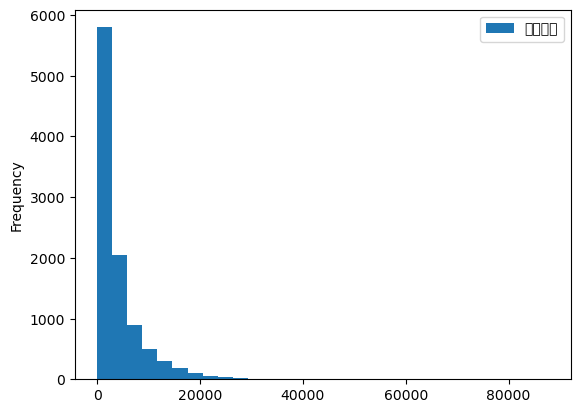

In [54]:
bike_sample_10000.plot.hist(y="이용거리",bins=30)

<AxesSubplot:>

C:\Users\22668\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\22668\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\22668\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\22668\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


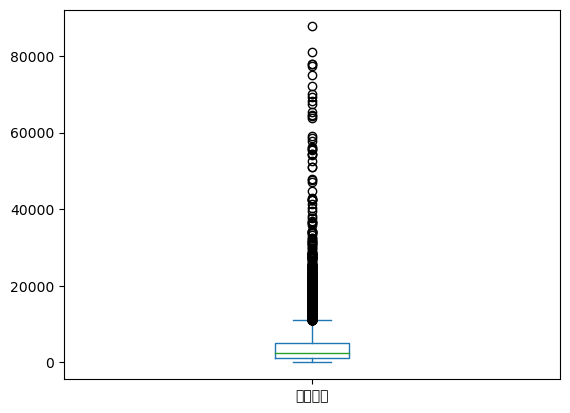

In [55]:
bike_sample_10000.plot.box(y="이용거리")

In [58]:
bike_sample_10000[["이용거리"]].describe()

,이용거리
count,10000.000000
mean,4263.389000
std,5808.952384
min,0.000000
25%,1200.000000
50%,2350.000000
75%,5142.500000
max,87720.000000


Text(0.5, 1.0, 'Population')

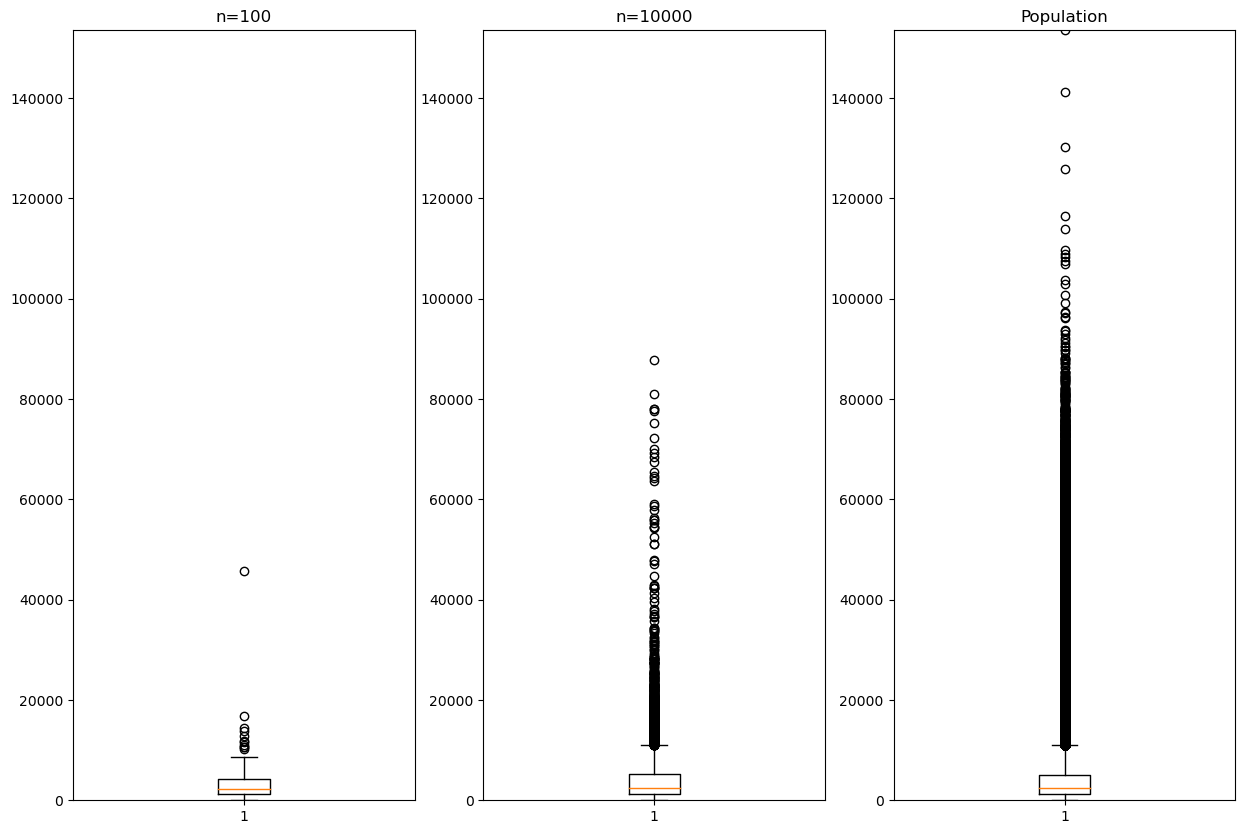

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,10))

axes[0].boxplot(bike_sample_100.이용거리)
axes[0].set_ylim(0,153500)
axes[0].set_title('n=100')

axes[1].boxplot(bike_sample_10000.이용거리)
axes[1].set_ylim(0,153500)
axes[1].set_title('n=10000')

axes[2].boxplot(bike.이용거리)
axes[2].set_ylim(0,153500)
axes[2].set_title('Population')

### insight
- 추출된 표본에 속한 데이터의 분포는 `경험적 분포(emprical distribution)`라고 함
    - `경험적`? $\to$ 추출된 관측값들의 분포라는 의미.
- 모집단을 대상으로 분포는 `경험적 분포`라 하지 않음 `모집단 분포`라고 함.
- 표본의 크기(sample size)가 증가할수록 확률표본에서 얻은 정보는 모집단에 대한 정보와 점점 가까워진다.
    - 당연함. 표본의 크기가 크다는 것 $\to$ 더 많은 데이터 포인트를 추출한다는 것 $\to$ 모집단과 비슷해짐
    - 모집단이 1000에서 크기가 999인 표본 하는거랑 50인 표본이랑 당연히 999인 표본이 더 모집단과 비슷하겠지?
    - 크기 10,000인 표본에서 얻은 정보, 즉 상자그림과 요약통계량은 모집단과 매우 유사.
    - 이용거리의 평균은 4263.4 m 로서 모집단의 평균 4253.3 m 와는 단 10 m 차이
    - 표본 크기가 100인 경우 보다 훨씬 더 모집단의 분포와 가까운 것을 알 수 있음
- 대수의 법칙
    - 표본의 크기(sample size)가 커질수록 확률표본의 경험적 분포가 모집단의 분포에 점점 가까워 진다.
    - 확률표본에서 얻은 정보는 모집단에 대한 정보와 점점 가까워진다.
    - keyword : `표본의 크기`,`증가`,`확률표본`,`경험적 분포`,`모집단의 분포`,`가까워`

:::{.callout-note}
#### 단순 임의 추출된 표본이 아닐경우는?(즉 확률표본이 아니고 편의표본인 경우는?) 
- 표본의 크기가 커진다 할지라도 모집단의 정보와 가까워 진다는 것을 보장할 수 없다. 
- 만약에 문제를 봤을때 단순임의추출이 아닌데도 표본의 크기가 증가하면 모집단을 잘 묘사한다 이런얘기가 나오면 잘못된 정보이다. 
- 대수의 법칙은 `단순임의추출된 확률표본이라는 가정`이 반드시 들어가야 한다.(밑에 편의표본 chapter에서 확인.)
:::

## 대수의 법칙 코드로 확인해보기

In [98]:
n = np.arange(10,2021,20)
sample_means = np.zeros(len(n))
for i,samplesize in enumerate(n):
    sample_means[i] = bike.sample(n=samplesize,replace = False)["이용거리"].mean()

In [99]:
sample_means

array([3877.        , 4586.66666667, 3894.        , 4593.57142857,
       4771.88888889, 4165.09090909, 4614.38461538, 4871.93333333,
       4359.94117647, 4225.42105263, 4036.85714286, 4602.47826087,
       4302.4       , 4397.48148148, 4216.93103448, 4150.        ,
       4590.33333333, 4376.68571429, 4506.24324324, 3784.92307692,
       4329.85365854, 4229.62790698, 4769.91111111, 4472.34042553,
       4300.44897959, 4500.68627451, 4305.35849057, 4436.89090909,
       4168.98245614, 3937.33898305, 4317.24590164, 4393.17460317,
       4196.83076923, 4144.29850746, 4027.97101449, 4125.61971831,
       4163.67123288, 4146.61333333, 4251.05194805, 4393.02531646,
       4152.65432099, 4299.57831325, 4323.30588235, 4105.93103448,
       3980.73033708, 4125.0989011 , 4292.44086022, 4142.        ,
       4214.03092784, 4421.85858586, 4428.78217822, 4354.7961165 ,
       4289.76190476, 4404.96261682, 4501.08256881, 4151.83783784,
       3987.73451327, 3989.22608696, 4279.93162393, 4340.97478

In [101]:
df_sample = pd.DataFrame({'n':n, 'sample_mean':sample_means })
df_sample.head(10)

,n,sample_mean
0,10,3877.000000
1,30,4586.666667
2,50,3894.000000
3,70,4593.571429
4,90,4771.888889
5,110,4165.090909
6,130,4614.384615
7,150,4871.933333
8,170,4359.941176
9,190,4225.421053


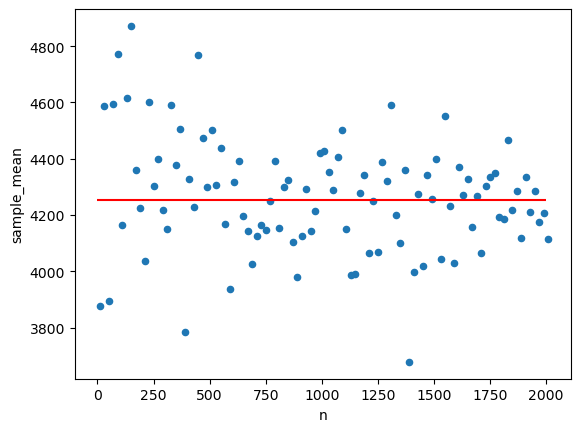

In [102]:
ax = df_sample.plot.scatter(x='n', y='sample_mean')
_ = ax.hlines(y=4253.336228, xmin=0, xmax=2000, colors='r')
plt.show()

# 대수의 법칙이 성립하지 않는 경우 - 편의표본

생략...